<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports,-File-Calling,-Data" data-toc-modified-id="Imports,-File-Calling,-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports, File Calling, Data</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Direct-File-Calling" data-toc-modified-id="Direct-File-Calling-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Direct File Calling</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Single-Call" data-toc-modified-id="Single-Call-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Single Call</a></span></li></ul></li></ul></li><li><span><a href="#Cycle-Lifetime" data-toc-modified-id="Cycle-Lifetime-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cycle Lifetime</a></span><ul class="toc-item"><li><span><a href="#Single-Call" data-toc-modified-id="Single-Call-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single Call</a></span></li></ul></li><li><span><a href="#DQDV" data-toc-modified-id="DQDV-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DQDV</a></span><ul class="toc-item"><li><span><a href="#Single-Call" data-toc-modified-id="Single-Call-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Single Call</a></span><ul class="toc-item"><li><span><a href="#Cycle---defined" data-toc-modified-id="Cycle---defined-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Cycle - defined</a></span></li><li><span><a href="#All-Cycles---overlaid" data-toc-modified-id="All-Cycles---overlaid-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>All Cycles - overlaid</a></span></li><li><span><a href="#Waterfall-Plot" data-toc-modified-id="Waterfall-Plot-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Waterfall Plot</a></span></li></ul></li></ul></li></ul></div>

# Imports, File Calling, Data

## Imports

Add and remove the imports as needed. I keep this in a snippet, and remove the imports I don't need before plotting. 

In [1]:
#This is excessive - I experimented too much and now there's no going back

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
from matplotlib.pyplot import cm
from matplotlib.text import OffsetFrom
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
import math
from pylab import rcParams
from pylab import figure
from pandas import read_excel 
import ipywidgets as widgets #change matplotlib to nbagg to make interative
from itertools import cycle
matplotlib.rcParams['font.family'] = 'cambria' 
matplotlib.rcParams['figure.figsize'] = 10, 6 #assign a size for figures

%matplotlib inline 
#change to nbagg for interactive
import glob #ID files - use if you want to iterate over a bunch of files in a 
    #folder with a different path than this one

#define sub/superscripts
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
print("C2H5OH".translate(subscript))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
print("PIr2".translate(superscript).replace('PI', 'π'))

C₂H₅OH
πr²


## Direct File Calling

In [2]:
file1 = "JRG_1_063022_SnSbcomps_3snsb_4_0-5C_32_Channel_32.xlsx"
#file2 = ''
#file3 = ''
#file4 = ''
#file5 = ''

## Data

### Single Call

This is for a single data-call. If you have multiple datasets that you want to compare ignore this. This imports cycle data from excel and assigns variables.

In [4]:
#New Arbin

discharge_index = 3    #look at sdu file - what you programmed for your schedule file
charge_index = 4       
mass = 0.0000402108       #mass of active material in grams


#data import: assigns variables to columns. Common source of errors. Make sure Cols align.
data = pd.read_excel(file1, 
                     sheet_name=1, 
                     usecols='B,D,E,F,H,I', 
                     names=['time','step','cycle','voltage','charge','discharge'])

data_by_cycle = data.groupby(['cycle','step']) #this is important for differential capacity plotting! Allows you to iterate over cycles

cycle_data = pd.read_excel(file1,  
        sheet_name=2,                        
        usecols='E,H,I',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])    #This function assigns data for lifetime plots  
num_cycles = data['cycle'].iat[-1]-1


In [5]:
#Old Arbin - this arbin generates different excel formatting. 

discharge_index = 3    #look at sdu file
charge_index = 4       
mass = 0.0000402108          #mass of active material in grams
#The old arbin makes a new sheet every 100 cycles - starting at 1, include how many sheets there are for data
X = [1,2,3] #sheets with full data - each sheet = 100 cycles

CS = 4      #cycle sheet

data = pd.DataFrame()

for x in X: 
    df = pd.read_excel(file7, 
                       sheet_name=x, 
                       usecols='B,E,F,H,I,J',
                       names=['time','step','cycle','voltage','charge','discharge'])
    data = pd.concat([data,df],axis=0)
    
data_by_cycle = data.groupby(['cycle','step']) 
cycle_data = pd.read_excel(file7,  
        sheet_name=CS,                        
        usecols='A,F,G',    
        names=['cycle','charge','discharge'])  
num_cycles = data['cycle'].iat[-1]-2

print(num_cycles)

256


# Cycle Lifetime

## Single Call

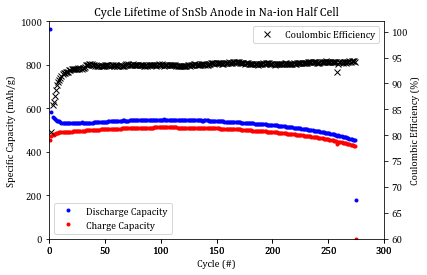

<Figure size 432x288 with 0 Axes>

In [68]:
cycle_fig = figure() #create an MPL figure

capacity = cycle_fig.add_subplot(111)    #makes the subplot for capacity data 
capacity.plot(cycle_data['cycle'],cycle_data['discharge']/mass*1000,'b.', label='Discharge Capacity')
capacity.plot(cycle_data['cycle'],cycle_data['charge']/mass*1000,'r.', label='Charge Capacity')
capacity.set_xlabel('Cycle (#)') 
capacity.set_ylabel('Specific Capacity (mAh/g)')
capacity.set_xlim(0,300)
capacity.set_ylim(0,1000)
plt.legend(loc="lower left")

CE = cycle_fig.add_subplot(111, sharex=capacity, frameon=False)    #making the coulombic efficiency plot
CE.plot(cycle_data['cycle'],
        (cycle_data['charge']/cycle_data['discharge'])*100,'kx', label='Coulombic Efficiency') 
CE.yaxis.tick_right()
CE.yaxis.set_label_position("right")
CE.set_ylabel('Coulombic Efficiency (%)',color='k')   
CE.set_ylim(60,102)

plt.title('Cycle Lifetime of SnSb Anode in Na-ion Half Cell')
plt.legend(loc='upper right')
plt.show()
#plt.savefig('file_name')

# DQDV

## Single Call

### Cycle - defined

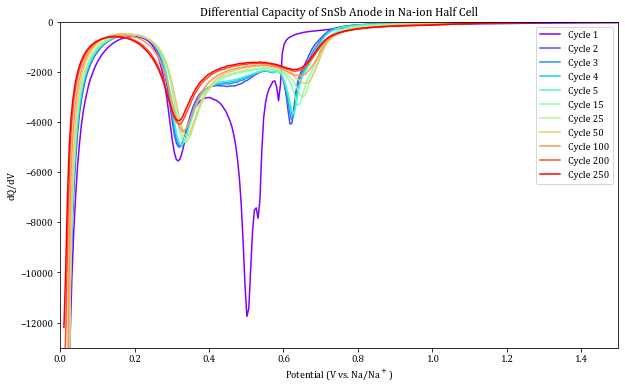

In [13]:
matplotlib.rcParams['figure.figsize'] = 10, 6 #figure size
n=11 #number of plots you will make
color=iter(cm.rainbow(np.linspace(0,1,n)))

for cycle in [1,2,3,4,5,15,25,50,100,200,250]:
    
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000 #makes an array of discharge data for the current cycle
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage'] #makes an array of voltage data for the current cycle
    dqdv = np.gradient(discharge)/np.gradient(voltage) #differential capacity
    p = plt.plot(voltage, dqdv, c=next(color),label='Cycle '+str(cycle)) 

    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    plt.plot(voltage, dqdv, color=p[0].get_color()) #label='Cycle '+str(cycle))
    
plt.xlim(0,1.5) #x-axis limits
plt.ylim(-13000,0) #y-axis limits
plt.ylabel('dQ/dV') 
plt.xlabel('Potential (V vs. Na/Na$^+$)')
plt.title('Differential Capacity of SnSb Anode in Na-ion Half Cell')
plt.legend()
plt.show()
#plt.savefig('JRG_01_06022022_timeexp_060222_22_Channel_22_pulled063022_dQdV_1-2-3-4-5-15-25-50-100-200-250_negative')

### All Cycles - overlaid

C:\Users\jessi\AppData\Local\Temp\ipykernel_22160\1516135246.py:10: RuntimeWarning: divide by zero encountered in true_divide
  dqdv = np.gradient(charge)/np.gradient(voltage)


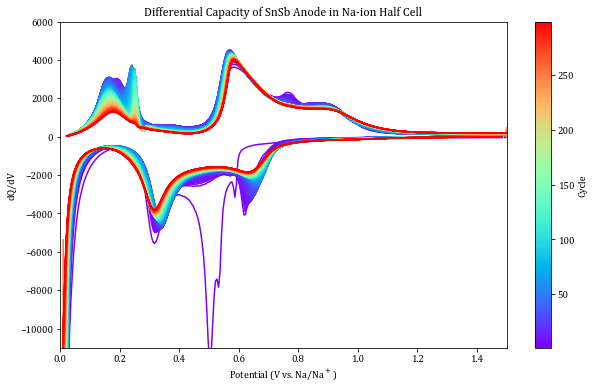

In [16]:
for cycle in range(1,num_cycles+1):
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    
    plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/num_cycles))
    
    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    
    #adds labels to only first and last cycles so legend isn’t huge
    if cycle ==1 or cycle == num_cycles:
        plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/(num_cycles)), label = "Cycle "+str(cycle))
    else:
        plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/num_cycles))


cmap = mpl.colormaps['rainbow']
norm = matplotlib.colors.Normalize(vmin=1, vmax=num_cycles)
cb = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.colorbar(cb, label='Cycle')

plt.xlim(0,1.5)
plt.ylim(-11000,6000)
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Na/Na$^+$)')
plt.title('Differential Capacity of SnSb Anode in Na-ion Half Cell')

#plt.legend()

#change label
#plt.savefig('_dqdv_sm')
############
plt.show()

### Waterfall Plot

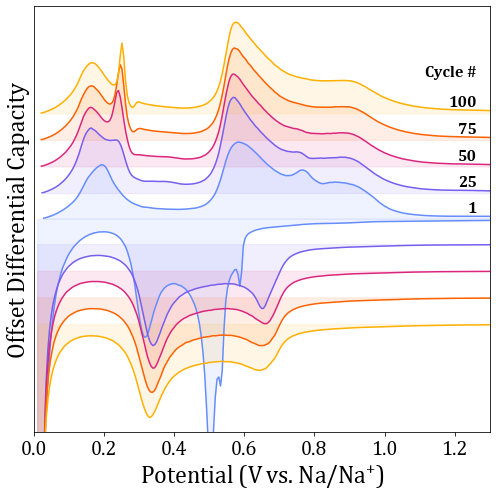

In [26]:
cycles = [1,25,50,75,100] #what cycles you want to plot
matplotlib.rcParams['figure.figsize'] = 7,7 #figure size
plt.tight_layout() 

#cmap - change to whatever
colormp = ['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colormp)

alp = 0.1 #alpha for fill-between, make zero for no fill
o_m = 50 #offset multiplier - used to calculate an offset proportional to the cycle number

Label = 'SnSb_Differential_Capacity_waterfall_7-7_IBMcmap_300dpi' #what you want the saved image to be called

for cycle in cycles:
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    dqdv = np.array(dqdv)
    o_a = o_m*(cycle - 1)
    dqdv = dqdv - o_a
    o_a_dc = 0-o_a
    o_a_c = 100 + o_a
    plt.plot(voltage, dqdv, color=cmap(cycle/(100)))
    plt.fill_between(voltage, dqdv,0 - (o_m*(cycle-1)),color=cmap(cycle/(100)), alpha=alp)
    #plt.annotate('Cycle '+str(cycle), (1.35,o_a_dc), xytext=(5, 5), textcoords="offset pixels")
    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    dqdv = np.array(dqdv)
    dqdv = dqdv + o_a
    plt.plot(voltage, dqdv, color=cmap(cycle/(100)))
    plt.fill_between(voltage, dqdv,0 + (o_m*(cycle-1)),color=cmap(cycle/(100)), alpha=alp)
    #adds labels to the side  
    plt.annotate(str(cycle), (1.25,o_a_c), xytext=(5, 5), textcoords="offset pixels",horizontalalignment='right', fontsize=16,weight='bold')
plt.annotate('Cycle #', (1.25, 6500), xytext=(5, 5), textcoords="offset pixels",horizontalalignment='right', fontsize=16,weight='bold')
plt.xlim(0,1.3)
plt.ylim(-10000,10000)
plt.yticks([])
plt.xticks([0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=20)
plt.ylabel('Offset Differential Capacity',fontsize=24)
plt.xlabel('Potential (V vs. $\mathregular{Na/Na^{+}}$)',fontsize=24)
#plt.title('Differential Capacity of SnSb Anode in Na-ion Half Cell',fontsize=20)
plt.tight_layout() #makes everything fit
#plt.legend()
plt.savefig(Label, dpi=300) 
plt.show()  